In [325]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [81]:
#load the data
glass_data=pd.read_excel("Downloads/Random Forest/Random Forest/glass.xlsx",sheet_name="glass")
#Exploratory Datasets
print("Total missing Values in the train dataset:",glass_data.isna().sum().sum())
#find duplicates in  dataset
print("No.of duplicate in train datasets:",end=" ")
print(glass_data.duplicated().sum()) 
glass_data=glass_data.drop_duplicates()
#check any duplicate in dataset after drop
print("No.of duplicate in datasets after drop:",end=" ")
print(glass_data.duplicated().sum())
#Select categorical data
print(glass_data.info())
print(glass_data.head())

Total missing Values in the train dataset: 0
No.of duplicate in train datasets: 1
No.of duplicate in datasets after drop: 0
<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB
None
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.2

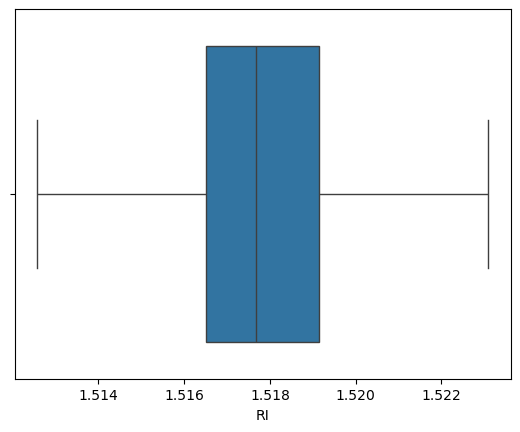

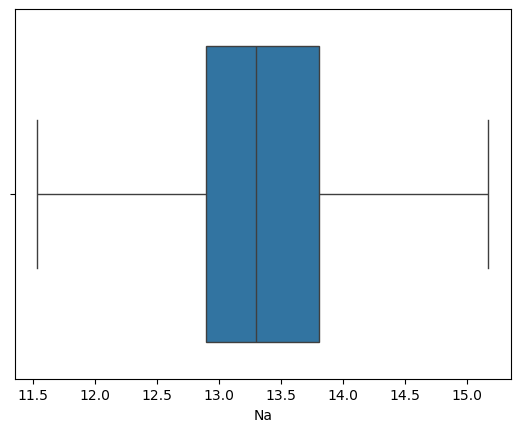

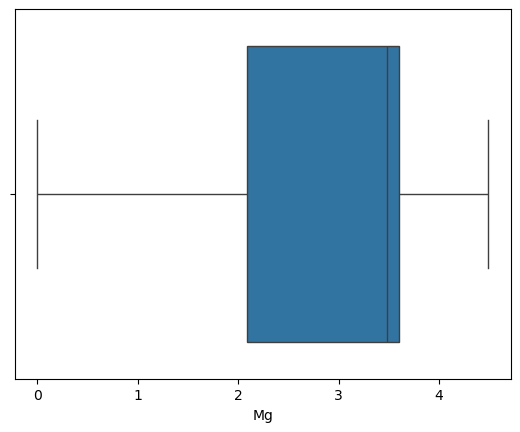

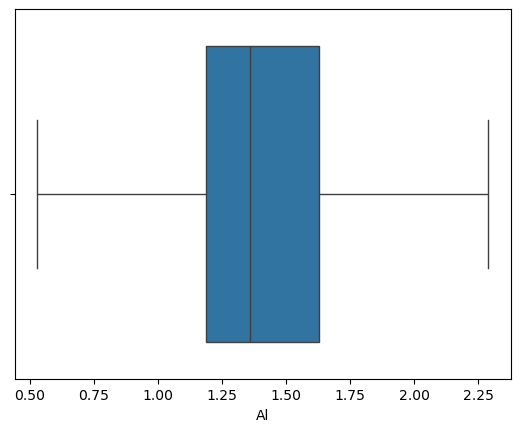

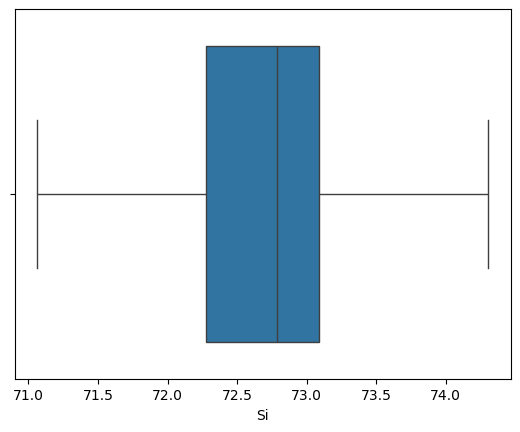

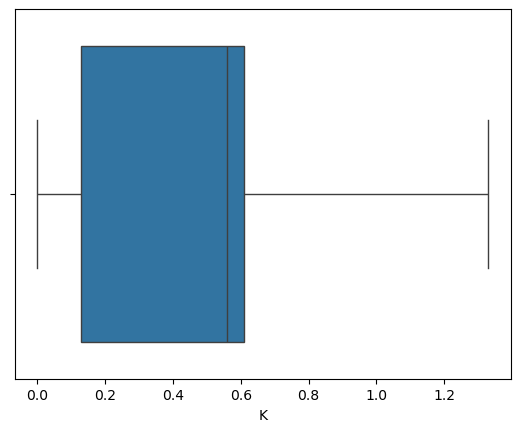

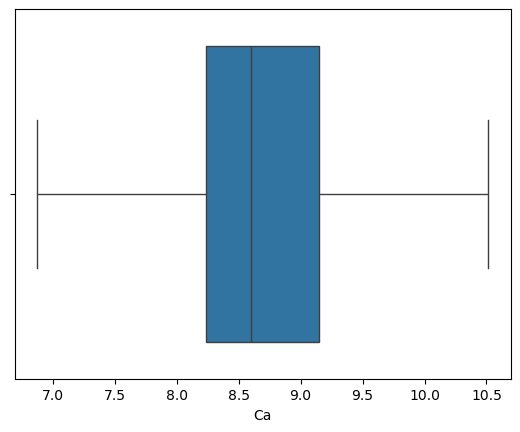

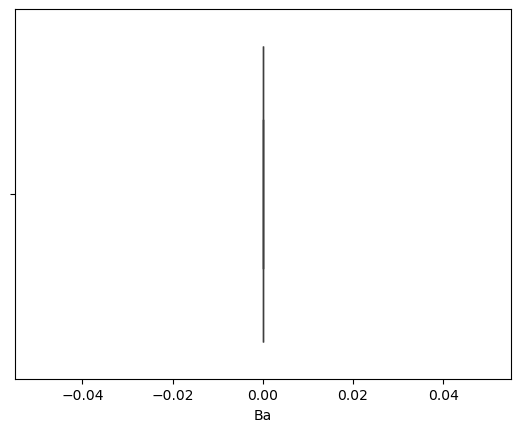

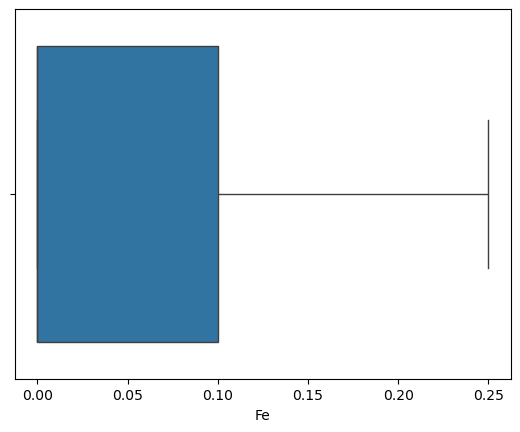

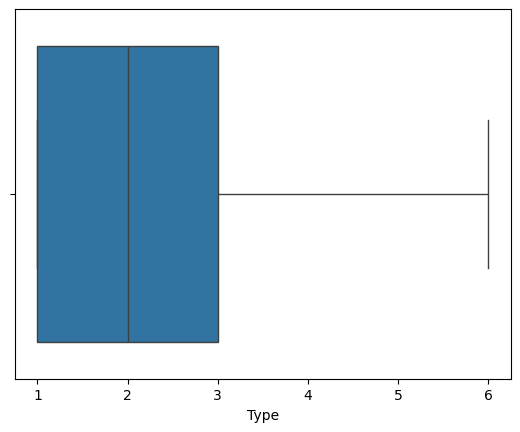

In [327]:
##Find outliers using boxplot for  dataset
for i in glass_data.select_dtypes(include="number").columns:
    sns.boxplot(data=glass_data,x=i)
    plt.show()

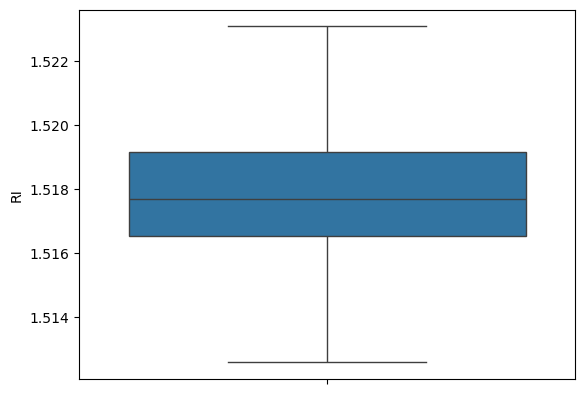

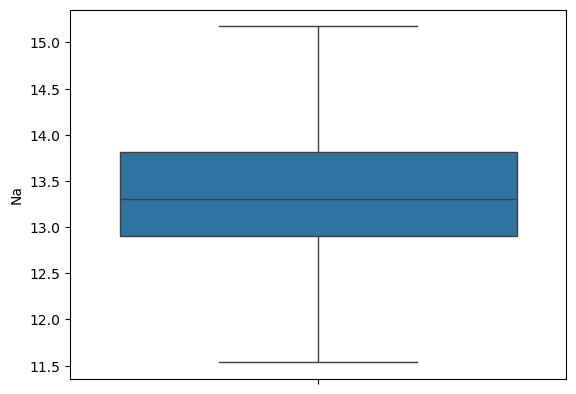

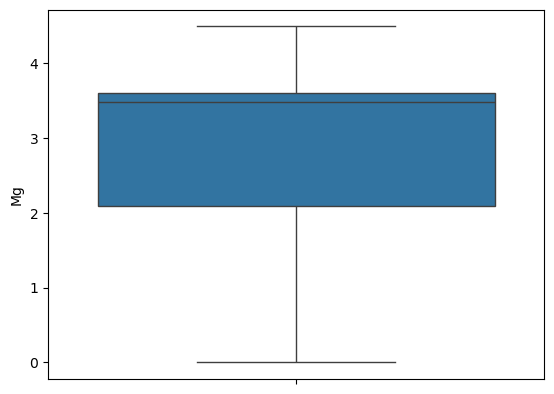

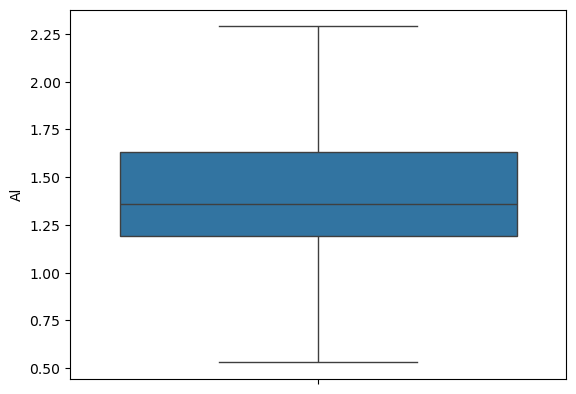

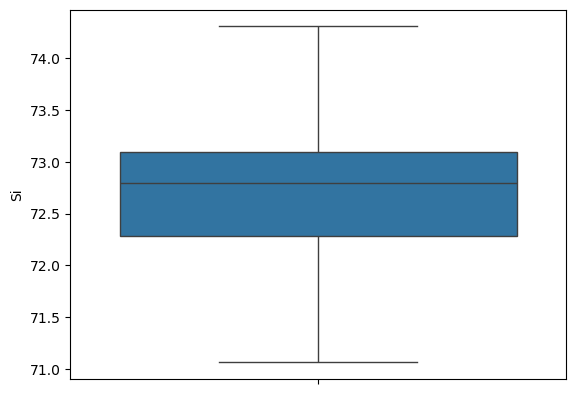

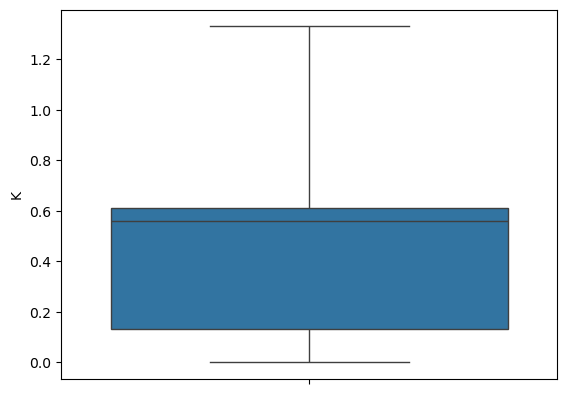

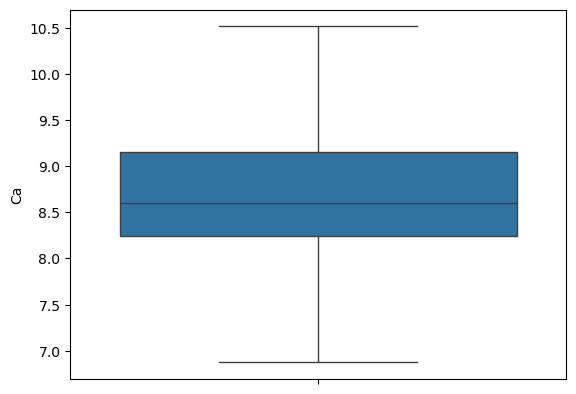

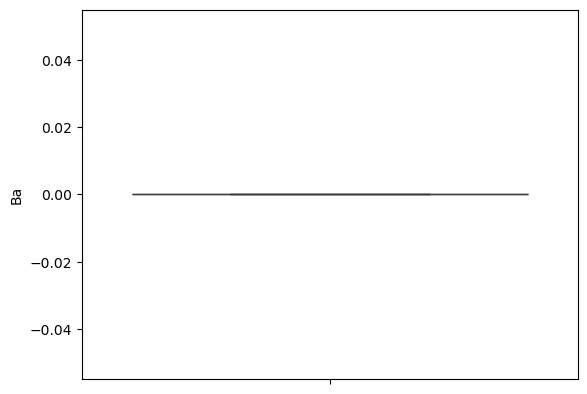

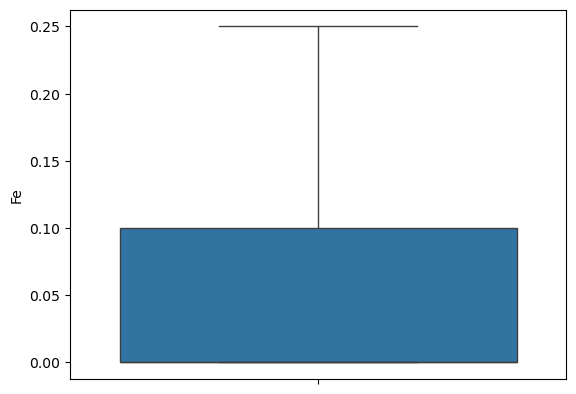

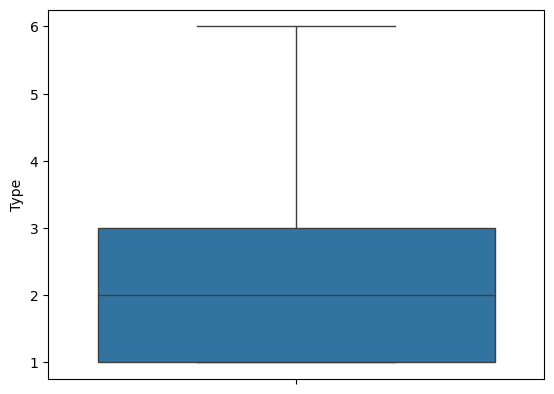

In [85]:
#Treatment for outliers/boxplot capping for  data
def remove_outlier(col):
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    lowerbound=q1-(1.5*(IQR))
    upperbound=q3+(1.5*(IQR))
    return lowerbound,upperbound
for i in glass_data.select_dtypes(include="number").columns:
    lower,upper=remove_outlier(glass_data[i])
    glass_data[i]=np.where(glass_data[i]<lower,lower,glass_data[i])
    glass_data[i]=np.where(glass_data[i]>upper,upper,glass_data[i])

#box plot after capping  train dataset
for i in glass_data.select_dtypes(include="number").columns:
    sns.boxplot(glass_data[i])
    plt.show()

In [329]:
#summary data
print("The Five summary for data:\n")
print(glass_data.describe())

The Five summary for data:

               RI          Na          Mg          Al          Si           K  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean     1.518145   13.401244    2.679202    1.424977   72.673146    0.441972   
std      0.002361    0.741659    1.443691    0.420895    0.657750    0.305433   
min      1.512575   11.535000    0.000000    0.530000   71.065000    0.000000   
25%      1.516520   12.900000    2.090000    1.190000   72.280000    0.130000   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.560000   
75%      1.519150   13.810000    3.600000    1.630000   73.090000    0.610000   
max      1.523095   15.175000    4.490000    2.290000   74.305000    1.330000   

               Ca     Ba          Fe        Type  
count  213.000000  213.0  213.000000  213.000000  
mean     8.788146    0.0    0.053099    2.652582  
std      0.860782    0.0    0.085692    1.843258  
min      6.875000    0.0    0.000000  

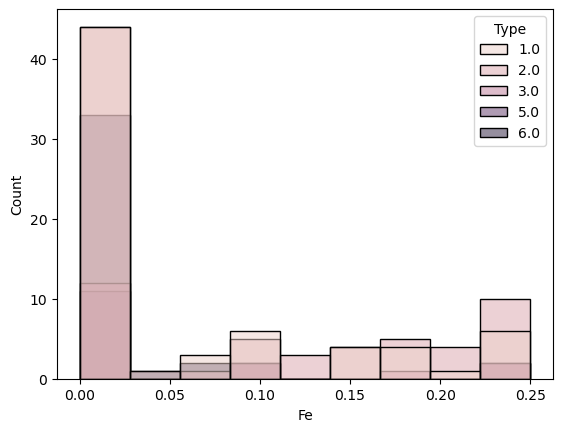

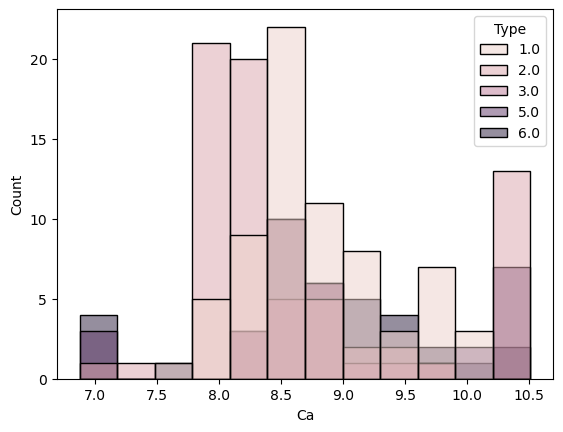

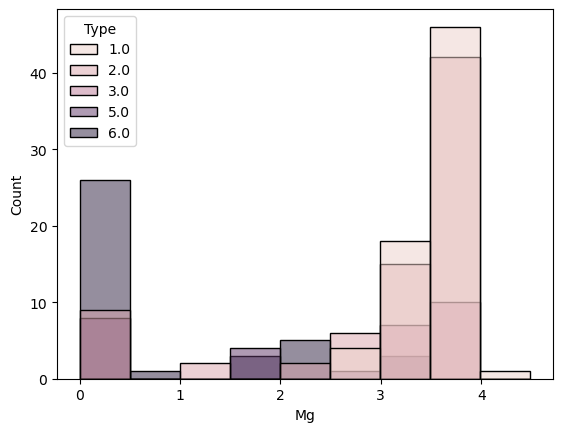

In [15]:
#histogram plot
sns.histplot(x="Fe",data=glass_data,hue="Type")
plt.show()
sns.histplot(x="Ca",data=glass_data,hue="Type")
plt.show()
sns.histplot(x="Mg",data=glass_data,hue="Type")
plt.show()

In [21]:
glass_data.Type.value_counts()

Type
2.0    76
1.0    69
6.0    38
3.0    17
5.0    13
Name: count, dtype: int64

In [331]:
#select x and y variables
x=glass_data.drop("Type",axis="columns")
y=glass_data["Type"]

In [333]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)
x_scale[:3]

array([[ 1.21609303,  0.3226798 ,  1.25723832, -0.77392745, -1.36107829,
        -1.25353611, -0.04441938,  0.        , -0.62110164],
       [-0.22720718,  0.6605561 ,  0.63931074, -0.15474077,  0.08664139,
         0.12479895, -1.11573287,  0.        , -0.62110164],
       [-0.83424227,  0.17401423,  0.6045957 ,  0.27392694,  0.48285941,
        -0.17055856, -1.17395642,  0.        , -0.62110164]])

In [335]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.2,random_state=25)

In [337]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((170, 9), (43, 9), (170,), (43,))

In [339]:
#create Random forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model=RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

In [341]:
y_pred=model.predict(x_test)

In [343]:
#accuracy score
print("Accuracy score for training data:",model.score(x_train,y_train))
print("Accuracy score for testing data:",model.score(x_test,y_test))

Accuracy score for training data: 1.0
Accuracy score for testing data: 0.7441860465116279


In [345]:
#confusion Matrix 
from sklearn.metrics import confusion_matrix
print("The confusion matrix for data:")
cm=confusion_matrix(y_test,y_pred,labels=[0,1])
print(cm)

The confusion matrix for data:
[[0 0]
 [0 9]]


In [347]:
from sklearn.metrics import classification_report
print("The classification Report:")
print(classification_report(y_test,y_pred))

The classification Report:
              precision    recall  f1-score   support

         1.0       0.69      0.75      0.72        12
         2.0       0.76      0.72      0.74        18
         3.0       0.25      0.50      0.33         2
         5.0       1.00      0.67      0.80         3
         6.0       1.00      0.88      0.93         8

    accuracy                           0.74        43
   macro avg       0.74      0.70      0.71        43
weighted avg       0.78      0.74      0.76        43



In [355]:
#create Random forest Model with hyperparameter
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
num_trees=140
model1=RandomForestClassifier(n_estimators=num_trees,
                             max_depth=9,
                             min_samples_split=10,
                             criterion="entropy",
                             class_weight="balanced",
                             random_state=42)
model1.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, min_samples_split=10, n_estimators=140,
                       random_state=42)

In [357]:

y_pred=model1.predict(x_test)

In [359]:
#accuracy score after hyperparameter
print("Accuracy score for training data:",model1.score(x_train,y_train))
print("Accuracy score for testing data:",model1.score(x_test,y_test))

Accuracy score for training data: 0.9705882352941176
Accuracy score for testing data: 0.813953488372093


In [363]:
#classification report with hyperparameter
from sklearn.metrics import classification_report
print("The classification Report:")
print(classification_report(y_test,y_pred))

The classification Report:
              precision    recall  f1-score   support

         1.0       0.83      0.83      0.83        12
         2.0       0.87      0.72      0.79        18
         3.0       0.25      0.50      0.33         2
         5.0       0.75      1.00      0.86         3
         6.0       1.00      1.00      1.00         8

    accuracy                           0.81        43
   macro avg       0.74      0.81      0.76        43
weighted avg       0.85      0.81      0.82        43



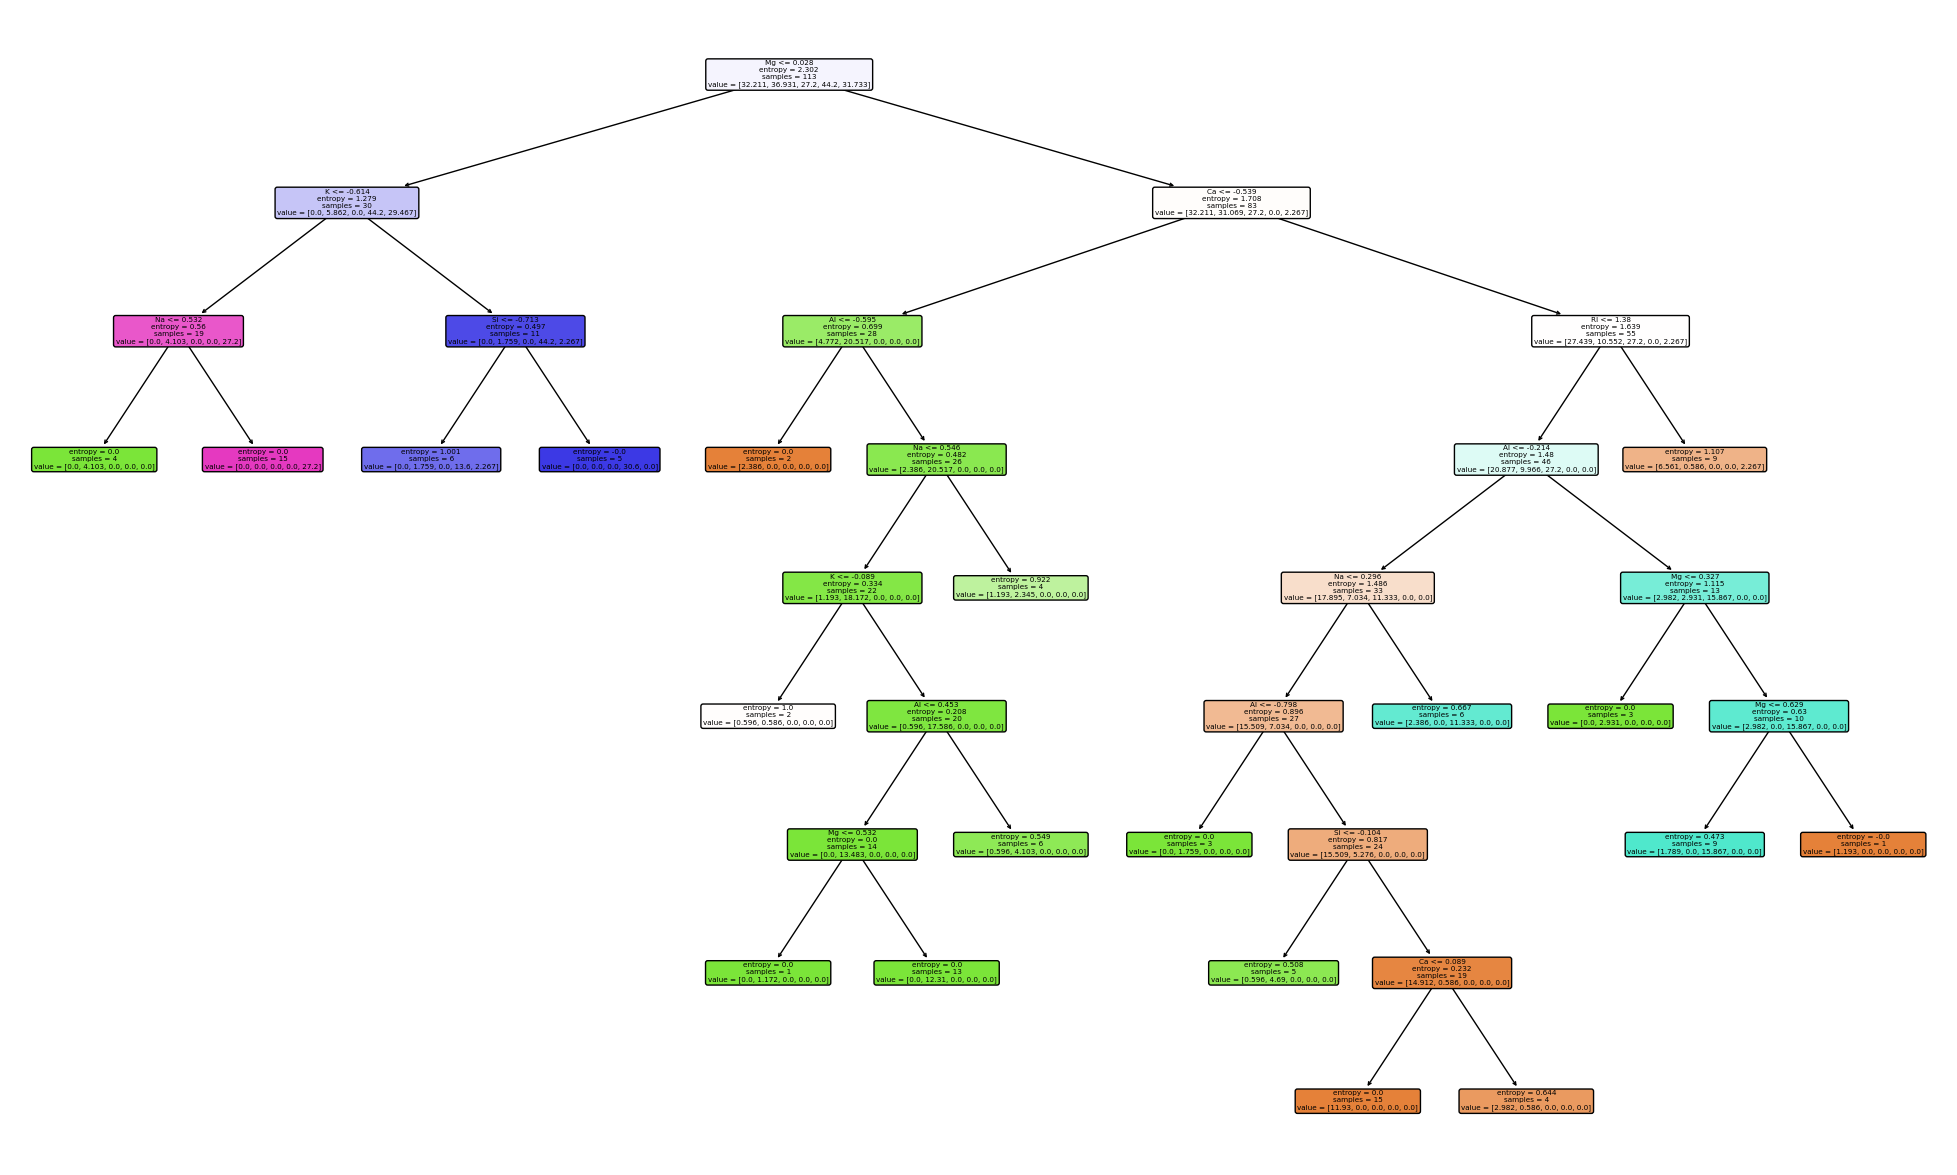

In [365]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,15))
plot_tree(model1.estimators_[0],
          feature_names=x.columns,
          filled=True,
          rounded=True)
plt.show()

In [399]:
#create Random forest Model with bagging and hyperparameter
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
num_trees=140
bag_model=BaggingClassifier(RandomForestClassifier(n_estimators=num_trees,
                             max_depth=9,
                             min_samples_split=10,
                             criterion="entropy",
                             class_weight="balanced",
                             random_state=42),
                            n_estimators=140,
                             random_state=42)
bag_model.fit(x_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                   criterion='entropy',
                                                   max_depth=9,
                                                   min_samples_split=10,
                                                   n_estimators=140,
                                                   random_state=42),
                  n_estimators=140, random_state=42)

In [401]:
y_pred=bag_model.predict(x_test)

In [403]:
#accuracy score bagging random forest classifier
print("Accuracy score for training data:",bag_model.score(x_train,y_train))
print("Accuracy score for testing data:",bag_model.score(x_test,y_test))

Accuracy score for training data: 0.9058823529411765
Accuracy score for testing data: 0.813953488372093


In [405]:
#classification report with hyperparameter
from sklearn.metrics import classification_report
print("The classification Report:")
print(classification_report(y_test,y_pred))

The classification Report:
              precision    recall  f1-score   support

         1.0       0.75      0.75      0.75        12
         2.0       0.82      0.78      0.80        18
         3.0       0.50      0.50      0.50         2
         5.0       0.75      1.00      0.86         3
         6.0       1.00      1.00      1.00         8

    accuracy                           0.81        43
   macro avg       0.76      0.81      0.78        43
weighted avg       0.82      0.81      0.81        43



In [ ]:
#create Random forest Model with boosting and hyperparameter
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
num_trees=140
boost_model=AdaBoostClassifier(RandomForestClassifier(n_estimators=num_trees,
                             max_depth=9,
                             min_samples_split=10,
                             criterion="entropy",
                             class_weight="balanced",
                             random_state=42),
                               n_estimators=140,
                             random_state=42)
boost_model.fit(x_train,y_train)

C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
y_pred=boost_model.predict(x_test)


In [ ]:
#accuracy score boosting random forest classifier
print("Accuracy score for training data:",boost_model.score(x_train,y_train))
print("Accuracy score for testing data:",boost_model.score(x_test,y_test))

In [397]:
#classification report with hyperparameter
from sklearn.metrics import classification_report
print("The classification Report:")
print(classification_report(y_test,y_pred))

The classification Report:
              precision    recall  f1-score   support

         1.0       0.64      0.58      0.61        12
         2.0       0.68      0.72      0.70        18
         3.0       0.20      0.50      0.29         2
         5.0       1.00      0.33      0.50         3
         6.0       1.00      0.88      0.93         8

    accuracy                           0.67        43
   macro avg       0.70      0.60      0.61        43
weighted avg       0.73      0.67      0.69        43

